In [1]:
import pandas as pd
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt
from collections import defaultdict
from datetime import datetime
import matplotlib.patches as mpatches
import matplotlib
import time
import math
from operator import itemgetter
from scipy.spatial import distance

In [2]:
def movieLensDataLoad():
    ## user 영화 별점 data 
    ratings = pd.read_csv('ml-1m/ratings.csv')

    ## movie meta(타이트,장르) data 
    movies = pd.read_csv('ml-1m/movies.csv')
    
    return ratings, movies

ratings, movies = movieLensDataLoad()

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


## User x Movie Matrix

In [5]:
UM_matrix_ds = ratings.pivot(index='userId', columns='movieId', values='rating')

In [6]:
UM_matrix_ds.head(2)

movieId,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
userId,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# American beauty PDF

In [7]:
american_beauty_id = movies[movies['title'] == 'American Beauty (1999)']
american_beauty_id

,movieId,title,genres
2789,2858,American Beauty (1999),Comedy|Drama


In [8]:
american_beauty_ratings = ratings[ratings['movieId'] == 2858]
american_beauty_ratings[:10]

,userId,movieId,rating,timestamp
105,2,2858,4,978298434
202,3,2858,4,978297039
299,5,2858,4,978241390
471,6,2858,1,978236809
585,8,2858,5,978229817
713,9,2858,4,978225333
1040,10,2858,3,978224627
1279,11,2858,5,978219634
1486,14,2858,3,978200645
1619,15,2858,4,978196348


In [9]:
rating_count = american_beauty_ratings.groupby('rating').rating.count()
rating_count

rating
1      83
2     134
3     358
4     890
5    1963
Name: rating, dtype: int64

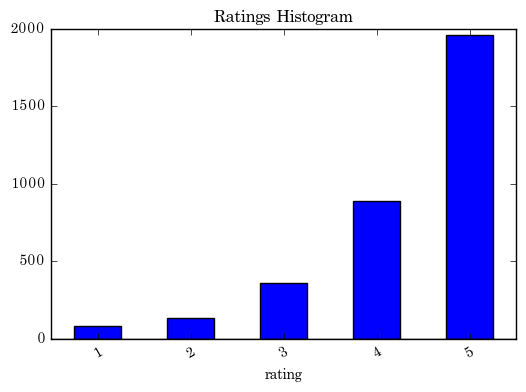

In [11]:
plt.title('Ratings Histogram')
rating_count.plot(kind='bar');
plt.axhline(0, color='k')
plt.rc('font', family='AppleMyungjo')
plt.xticks(rotation=30)
plt.show()

# American Beauty Review Top 5 Revies count Euclidean

In [12]:
userId_count = ratings.groupby('userId').userId.count()
rating_count = pd.DataFrame({'userId':userId_count.index, 'rating_count':userId_count.values})
rating_count.sort_values('rating_count', ascending=False, inplace=True)
rating_count[:5]

,rating_count,userId
4168,2314,4169
1679,1850,1680
4276,1743,4277
1940,1595,1941
1180,1521,1181


In [13]:
user_unit = []
rating_count_unit = []

for user in american_beauty_ratings['userId']:
    user_unit.append(user)
    selected = rating_count[rating_count['userId'] == user]
    rating_count_unit.append(selected.iloc[0]['rating_count'])
    
df = pd.DataFrame({'userId':user_unit, 'rating_count':rating_count_unit})
df.sort_values('rating_count', ascending=False, inplace=True)
top5_reviewer = df[:5]
top5_reviewer

,rating_count,userId
2441,2314,4169
1024,1850,1680
2485,1743,4277
1185,1595,1941
704,1521,1181
